In [6]:
import ZMX
from raytrace import raytrace, coords, lprint
import numpy as np
import ceo
#from plotly.offline import download_plotlyjs, init_notebook_mode, iplot
#import plotly.plotly as py       
#import plotly.graph_objs as go
#init_notebook_mode()
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [48]:
reload(ZMX)
D = np.double(30e-3)
nPx = 15
A = ceo.Aperture(D,0,nPx)
src  = ceo.Source("R",rays_box_size=D,rays_box_sampling=nPx,rays_origin=[0.0,0.0,0.0])
A.vignetting(src)
xyz = []
xyz = [src.rays.coordinates.host()]

In [49]:
print("Reading in Zemax file")
ZmxModel = ZMX.ZemaxModel("ZmxFiles/conic1_zern.zmx", src)

S          = ZmxModel.surfaces[1:]
GlassIndex = ZmxModel.GlassIndex

# Rewrite S manually, for testing
# First surface is the entrance
# Next is plano lens surface, with zernike coma
# Next is convex lens with conic constant.
# Final is the image surface
S = [
    ceo.Conic(0,     1,   material='',    origin = [0.0, 0.0, 0.0]),
    ceo.Conic(0.0,   1,   material='BK7', origin = [0.0, 0.0, 0.01], zernike_a = np.array([0,0,0,0,0,0,1.0e-3])),
    ceo.Conic(-20.0, 1.3, material='',    origin = [0.0, 0.0, 0.1]),
    ceo.Conic(0.0,   1,   material='',    origin = [0.0, 0.0, 0.095]) 
]

print("Updating materials")
[ZMX.update_material(s, GlassIndex) for s in S]

Reading in Zemax file
[0.0, 1.0]
{'origin': [0.0, 0.0, 0.0], 'material': '', 'euler_angles': [0.0, 0.0, 0.0]}
[0.0, 1.0]
{'origin': [0.0, 0.0, 0.0], 'material': '', 'euler_angles': [0.0, 0.0, 0.0]}
[10.0, 1.3]
{'origin': [0.0, 0.0, 0.1], 'material': 'BK7', 'euler_angles': [0.0, 0.0, 0.0]}
in PARM with type  SZERNSAG
do_standardzernikesag
0.015 0.0 0.0 [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1e-05, 0.0, 0.0, 0.0]
[-10.0, 1.0]
{'origin': [0.0, 0.0, 0.01], 'material': '', 'zernike_a': array([0.e+00, 0.e+00, 0.e+00, 0.e+00, 0.e+00, 0.e+00, 1.e-05, 0.e+00,
       0.e+00, 0.e+00]), 'euler_angles': [0.0, 0.0, 0.0]}
[0.0, 1.0]
{'origin': [0.0, 0.0, 0.095], 'material': '', 'euler_angles': [0.0, 0.0, 0.0]}
Updating materials


[None, None, None, None]

### This is how the rays were traced in the original zemax examples.  Seems to do the right thing, but the zernike terms are ignored:

In [50]:

print("Tracing rays")
[raytrace(src,S,k+1,xyz) for k in range(len(S))]

Tracing rays

Material refractive index: 1
x: 0.0                  y: 0.0                  z: 0.0                 
k: 0.0                  l: 0.0                  m: 1.0                 

BK7
Material refractive index: 1.51484623799
x: 0.0                  y: 0.0                  z: 0.01                
k: 0.0                  l: 0.0                  m: 1.0                 


Material refractive index: 1
x: 0.0                  y: 0.0                  z: 0.11                
k: 0.0                  l: 0.0                  m: 1.0                 


Material refractive index: 1
x: 0.0                  y: 0.0                  z: 0.205               
k: 0.0                  l: 0.0                  m: 1.0                 



[None, None, None, None]

### Make a spot diagram for each surface, and a color map of the z values of the ray intersections, and print those out as well.  The zernike surface has identical ray intercepts, which is not correct.

### The aperture is applied only to the first surface.  Do you have to call the vignetting method after every call to raytrace?

('-----', 0, '-----')
[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]
('-----', 1, '-----')
[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.

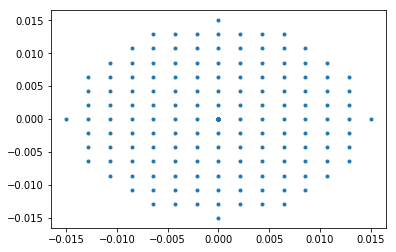

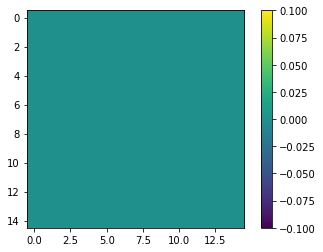

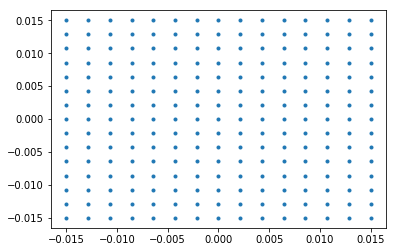

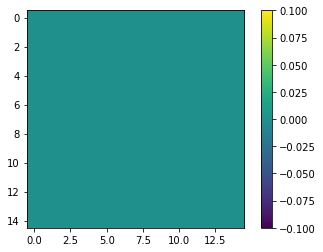

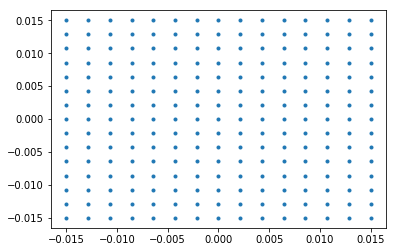

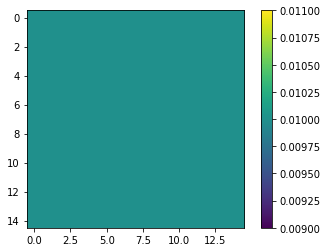

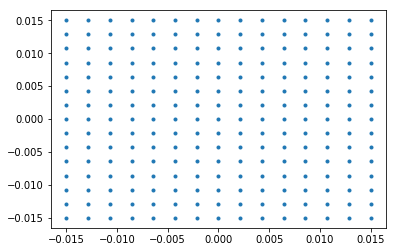

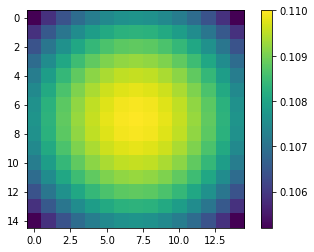

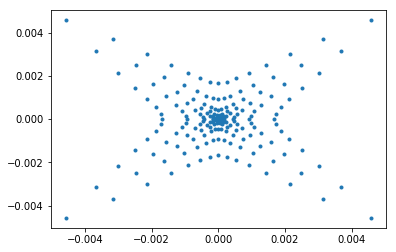

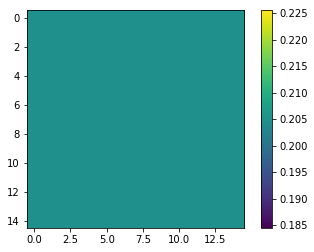

In [41]:
for index,surf in enumerate(range(len(xyz))):
    plt.figure()
    plt.plot(xyz[surf][:,0],xyz[surf][:,1],'.')
    plt.figure()
    plt.imshow(xyz[surf][:,2].reshape((nPx,nPx)))
    plt.colorbar()
    print("-----", index, "-----")
    print(xyz[surf][:,2].reshape((nPx,nPx)))

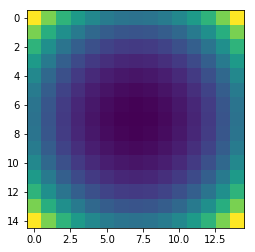

In [42]:
opd = src.rays.optical_path_difference.host()
plt.figure()
plt.imshow(opd.reshape((nPx,nPx)))

In [43]:
A = ceo.Aperture(0.030,0,nPx)


### Now trace the rays using the "trace" method.  I'm not sure if this is what Rod meant.  It does not give correct z values. They are just the differential distances between surfaces, not the cumulative.  However, the coma does appear and is transmitted to the next surface.  It's as if this method ignores the conic.

0.0
0.01
0.09998963232779097
0.095


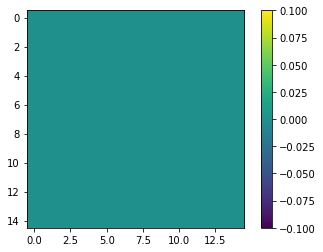

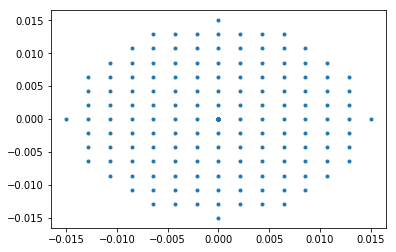

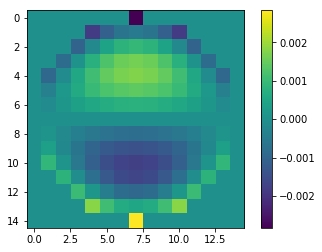

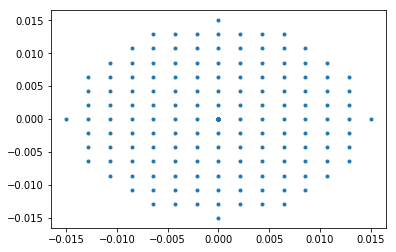

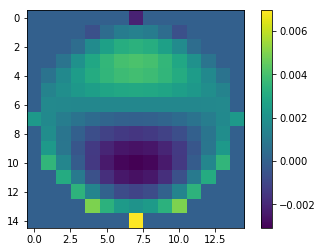

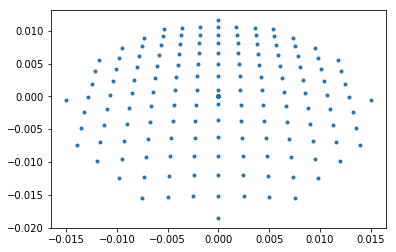

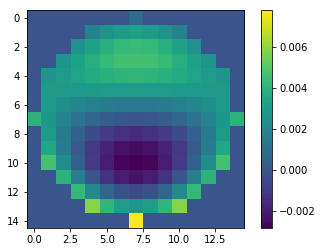

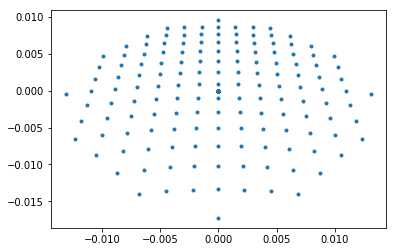

In [51]:
src.reset()
A.vignetting(src)
for S0 in S:
    S0.trace(src)
    opd = src.rays.optical_path_difference.host()
    plt.figure()
    plt.imshow(opd.reshape((nPx,nPx)))
    plt.colorbar()
    xyz = src.rays.coordinates.host()
    print(xyz.reshape((nPx,nPx,3))[nPx//2,nPx//2,2])
    plt.figure()
    plt.plot(xyz[:,0],xyz[:,1],'.')